# Survival Analysis on the Titanic
### Building a Predictive Model for Titanic Survival Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 1 - Import the dataset

In [2]:
train = pd.read_csv('Titanic_train.csv')

In [3]:
test = pd.read_csv('Titanic_test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Step 2 - Data Exploration

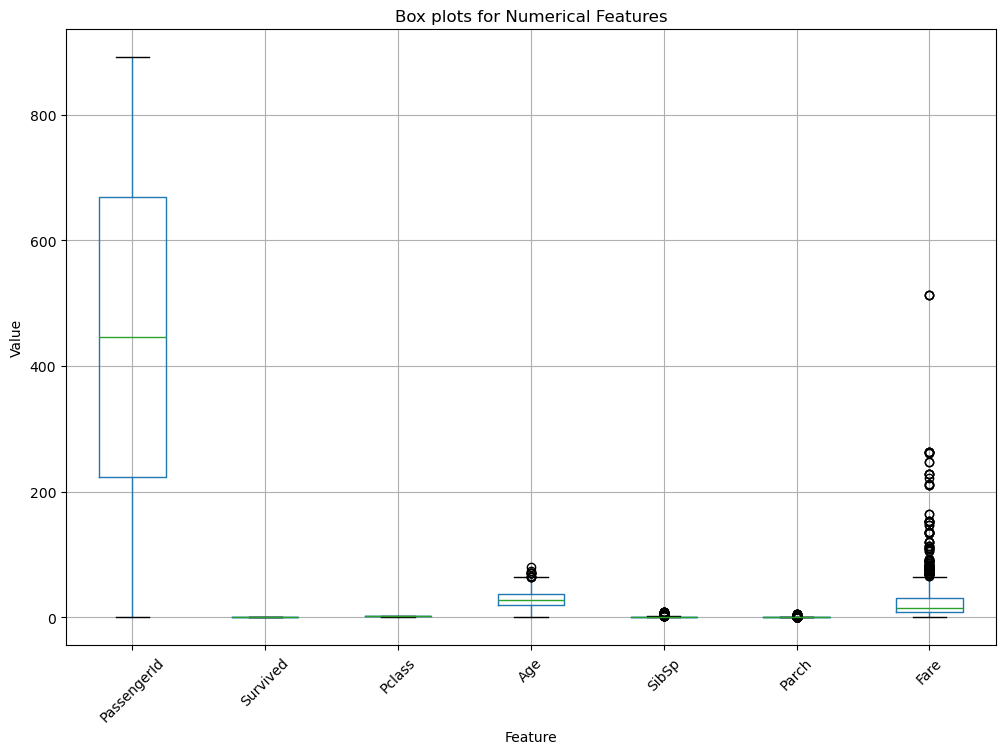

In [11]:
# Create box plots for all numerical features
numerical_cols = train.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(12, 8))
train[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box plots for Numerical Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

In [12]:
!pip install sweetviz
import sweetviz as sv
df = pd.read_csv("Titanic_train.csv") 
report = sv.analyze(df)
report.show_html("sweetviz_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


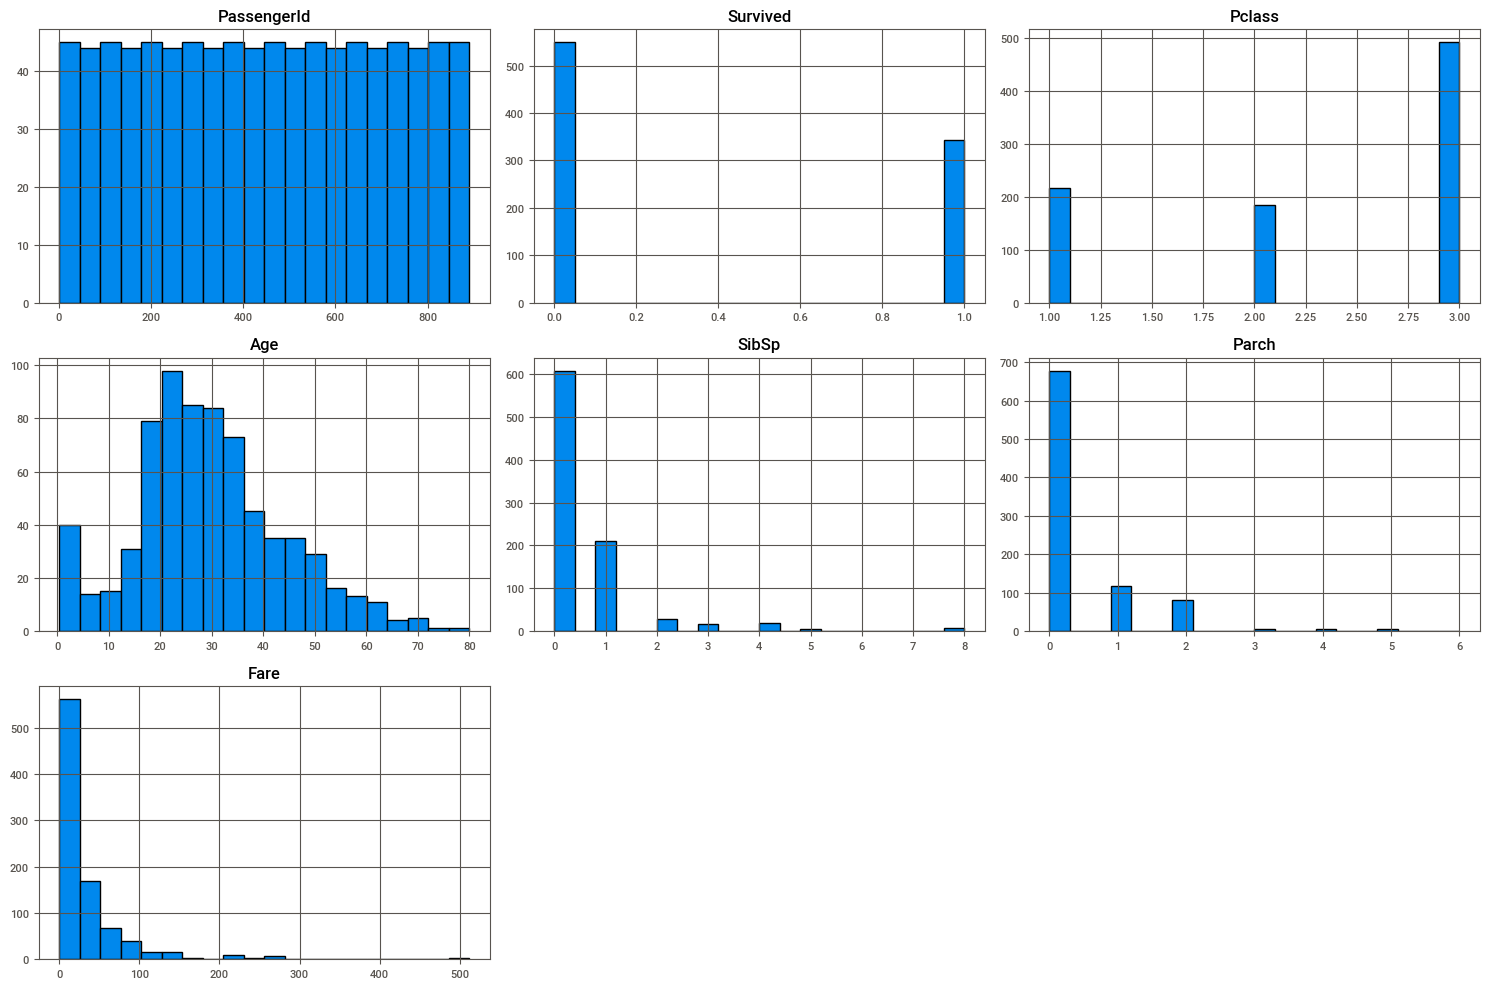

In [13]:
train.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

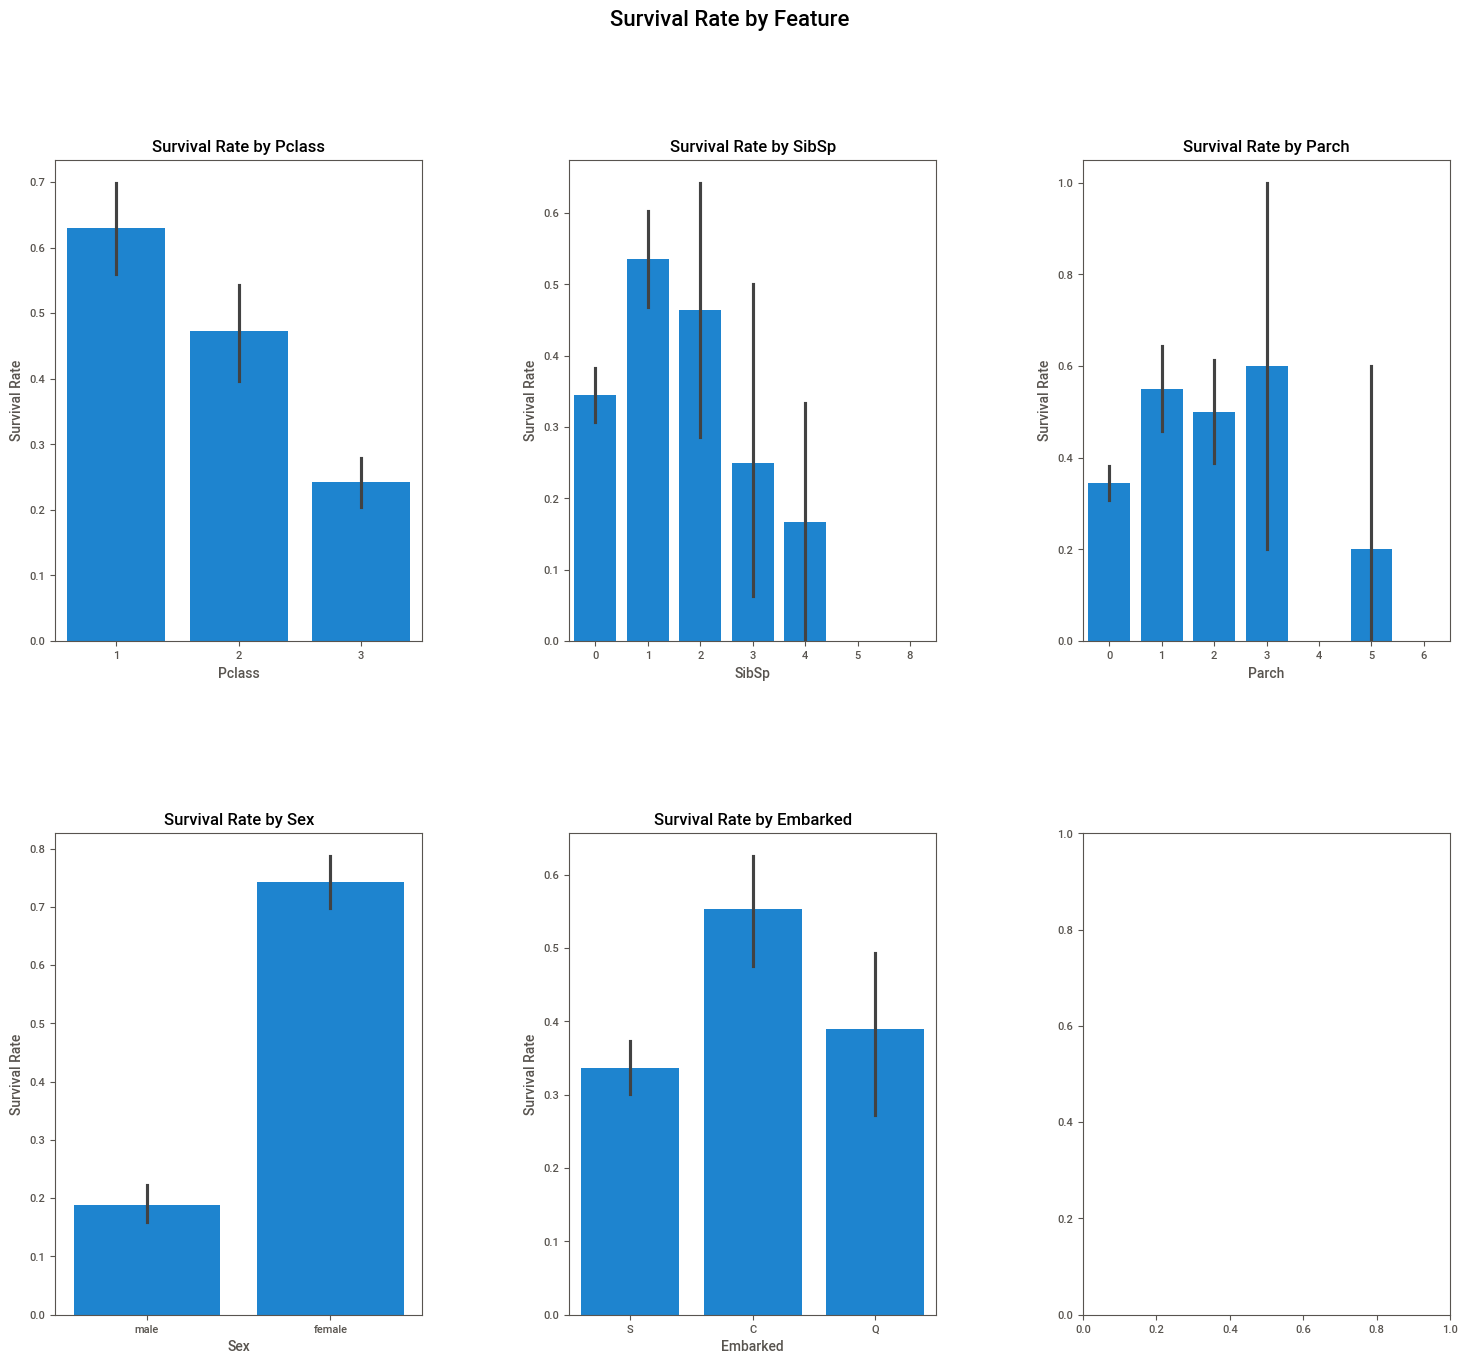

In [14]:
# check the realtion of each colum with survivrd rate
columns = ['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 15))
fig.suptitle("Survival Rate by Feature", fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 3)  
    sns.barplot(x=col, y='Survived', data=train, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Survival Rate by {col}')
    axes[row, col_idx].set_ylabel('Survival Rate')
    axes[row, col_idx].set_xlabel(col)

plt.show()

<Axes: >

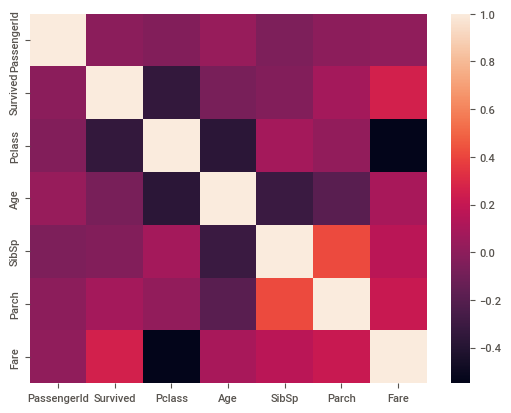

In [15]:
sns.heatmap(train.select_dtypes(include=['int', 'float']).corr())

## Step 3 - Data Preprocessing

### Handleing missing values for both training and testing dataset

In [16]:
mean_val = train['Age'].mean()  
train['Age'].fillna(mean_val, inplace=True)  

In [17]:
print(mean_val)

29.69911764705882


In [18]:
mode_val = train['Cabin'].mode()[0]  
train['Cabin'].fillna(mode_val, inplace=True)  

In [19]:
print(mode_val)

B96 B98


In [20]:
test_mean_val = test['Age'].mean()  
test['Age'].fillna(mean_val, inplace=True)  

In [21]:
fare_mean = test['Fare'].mean()  
test['Fare'].fillna(fare_mean, inplace=True)  

In [22]:
print(test_mean_val)

30.272590361445783


In [23]:
test_mode_val = test['Cabin'].mode()[0]  
test['Cabin'].fillna(mode_val, inplace=True) 

In [24]:
print(test_mode_val)

B57 B59 B63 B66


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [26]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [27]:
# Dropping the rows of Embarked column where the values are missing (5 values missing)
train.dropna(subset=['Embarked'], inplace=True)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


### Encoding categorical variables for training and testing dataset

In [29]:
train.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 680, dtype: int64

In [30]:
train.Cabin.value_counts()

Cabin
B96 B98        691
G6               4
C23 C25 C27      4
F2               3
E101             3
              ... 
C82              1
E50              1
D10 D12          1
D37              1
C148             1
Name: count, Length: 146, dtype: int64

In [31]:
freq_encoding = train['Cabin'].value_counts()  # Get the frequency of each unique value
train['Cabin_encoded'] = train['Cabin'].map(freq_encoding)

In [32]:
test_freq_encoding = test['Cabin'].value_counts()  
test['Cabin_encoded'] = test['Cabin'].map(test_freq_encoding)

In [33]:
freq_encoding = train['Ticket'].value_counts()  
train['Ticket_encoded'] = train['Ticket'].map(freq_encoding)

In [34]:
test_freq_encoding = test['Ticket'].value_counts()  
test['Ticket_encoded'] = test['Ticket'].map(test_freq_encoding)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['sex_encoded'] = le.fit_transform(train['Sex'])

In [36]:
test['sex_encoded'] = le.fit_transform(test['Sex'])

In [37]:
train['Embarked_encoded'] = le.fit_transform(train['Embarked'])

In [38]:
test['Embarked_encoded'] = le.fit_transform(test['Embarked'])

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded,Ticket_encoded,sex_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,691,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,691,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,691,1,1,2


In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded,Ticket_encoded,sex_encoded,Embarked_encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B96 B98,Q,327,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B96 B98,S,327,1,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B96 B98,Q,327,1,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B96 B98,S,327,1,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B96 B98,S,327,1,0,2


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Name              418 non-null    object 
 3   Sex               418 non-null    object 
 4   Age               418 non-null    float64
 5   SibSp             418 non-null    int64  
 6   Parch             418 non-null    int64  
 7   Ticket            418 non-null    object 
 8   Fare              418 non-null    float64
 9   Cabin             418 non-null    object 
 10  Embarked          418 non-null    object 
 11  Cabin_encoded     418 non-null    int64  
 12  Ticket_encoded    418 non-null    int64  
 13  sex_encoded       418 non-null    int32  
 14  Embarked_encoded  418 non-null    int32  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 45.8+ KB


In [42]:
new_train = train.drop(columns=['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket'])

In [43]:
new_test = test.drop(columns=['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket'])

In [44]:
new_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_encoded,Ticket_encoded,sex_encoded,Embarked_encoded
0,1,0,3,22.0,1,0,7.2500,691,1,1,2
1,2,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,691,1,0,2
3,4,1,1,35.0,1,0,53.1000,2,2,0,2
4,5,0,3,35.0,0,0,8.0500,691,1,1,2


In [45]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_encoded,Ticket_encoded,sex_encoded,Embarked_encoded
0,892,3,34.5,0,0,7.8292,327,1,1,1
1,893,3,47.0,1,0,7.0000,327,1,0,2
2,894,2,62.0,0,0,9.6875,327,1,1,1
3,895,3,27.0,0,0,8.6625,327,1,1,2
4,896,3,22.0,1,1,12.2875,327,1,0,2


## Step 4 - Model Building

### Building logistic regression model 

In [46]:
# Separate features and target variable
X_train = train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_encoded', 'Ticket_encoded', 'sex_encoded', 'Embarked_encoded']]
y_train = train['Survived']

In [47]:
X_test = test[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_encoded', 'Ticket_encoded', 'sex_encoded', 'Embarked_encoded']]

In [48]:
# Standardize the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Step 5 - Model Evaluation

In [50]:
# Make Predictions
y_train_pred = model.predict(X_train_scaled)  # Predictions on training data
y_test_pred = model.predict(X_test_scaled)    # Predictions on testing data

In [51]:
# Calculate Accuracy Scores
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
train_accuracy = accuracy_score(y_train, y_train_pred)  # Accuracy on training data
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7975253093363329


In [52]:
# Checking for predicted data
input_data = np.array([1, 3, 22.0,	1,	0,	7.2500,	691, 1,	1, 2]).reshape(1, 10)
scaled_data = scaler.transform(input_data)
prediction = model.predict(scaled_data)
print(prediction)

[0]


In [53]:
# Split the Training Data into Training and Validation Sets
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [54]:
# Make Predictions on the Validation Set
y_val_pred = model.predict(X_val_split)
y_val_proba = model.predict_proba(X_val_split)[:, 1]  # Probabilities for ROC AUC

In [55]:
# Calculate Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
accuracy = accuracy_score(y_val_split, y_val_pred)
precision = precision_score(y_val_split, y_val_pred)
recall = recall_score(y_val_split, y_val_pred)
f1 = f1_score(y_val_split, y_val_pred)
roc_auc = roc_auc_score(y_val_split, y_val_proba)

# Print the metrics
print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1 Score:", f1)
print("Validation ROC AUC Score:", roc_auc)

Validation Accuracy: 0.8033707865168539
Validation Precision: 0.7361111111111112
Validation Recall: 0.7681159420289855
Validation F1 Score: 0.75177304964539
Validation ROC AUC Score: 0.8554713468953596


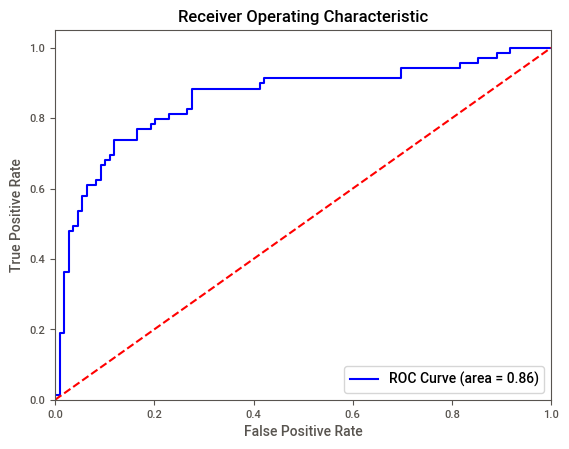

In [56]:
# Visualize the ROC Curve
fpr, tpr, thresholds = roc_curve(y_val_split, y_val_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [57]:
# Make Predictions on the Test Data
y_test_pred = model.predict(X_test_scaled)
# Save Predictions to CSV
predictions_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Predicted_Survived': y_test_pred
})
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'.")

Predictions saved to 'predictions.csv'.


In [58]:
input_data = np.array([1, 3, 22.0,	1,	0,	7.2500,	691, 1,	1, 2]).reshape(1, 10)
scaled_data = scaler.transform(input_data)
# Make prediction
prediction = model.predict(scaled_data)
print("Predicted Survived:", prediction[0])  # Print the predicted result (0 or 1)

Predicted Survived: 0


## Generating pickle file

In [59]:
import pickle
pickle.dump(model,open('model.pkl','wb'))